In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [10]:
np.random.seed(0)
X = np.random.rand(100, 5)  # 100개의 샘플, 5개의 특징
y = 2 * X[:, 0] + 3 * X[:, 1] + (-1) * X[:, 2] + 0 * X[:,3] + 0 * X[:,4] + np.random.randn(100) # 선형 관계 + 노이즈

In [11]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=2025)
print("X_tr.shape:", X_tr.shape)
print("X_te.shape:", X_te.shape)
print("y_tr.shape:", y_tr.shape)
print("y_te.shape:", y_te.shape)

X_tr.shape: (80, 5)
X_te.shape: (20, 5)
y_tr.shape: (80,)
y_te.shape: (20,)


In [12]:
scaler_X = StandardScaler().fit(X_tr)
X_norm_tr = scaler_X.transform(X_tr)
X_norm_te = scaler_X.transform(X_te)

In [13]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'SGD Regression': SGDRegressor(max_iter=1000, tol=1e-3)
}

In [14]:
for name, model in models.items():
  _ = model.fit(X_norm_tr, y_tr)

In [15]:
predictions = dict()
for name, model in models.items():
  predictions[name] = model.predict(X_norm_te)

In [16]:
results = []
for name, p_te in predictions.items():
    mse = mean_squared_error(y_te, p_te)
    r2 = r2_score(y_te, p_te)
    results.append({'Model':name, 'MSE':mse, 'R2':r2})
df_res = pd.DataFrame(results)
print(df_res)

               Model       MSE        R2
0  Linear Regression  1.525408  0.475451
1              Ridge  1.534963  0.472165
2              Lasso  2.912285 -0.001461
3         ElasticNet  2.702193  0.070784
4     SGD Regression  1.567392  0.461013


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

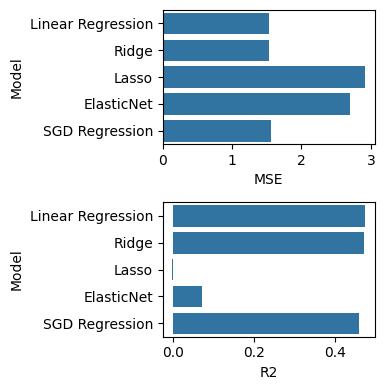

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(4,4))
_ = sns.barplot(df_res, x='MSE', y='Model', ax=ax[0])
_ = sns.barplot(df_res, x='R2', y='Model', ax=ax[1])
plt.tight_layout()
plt.show()